In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

df = pd.read_csv('https://query.data.world/s/rzrtzsfhlgqzjfkkh3buv7vkyljz2e?dws=00000')

In [2]:
df.shape

(246091, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [4]:
#Checking for missing values
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [5]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [6]:
df.corr()

,Crop_Year,Area,Production
Crop_Year,1.000000,-0.026022,0.006989
Area,-0.026022,1.000000,0.040587
Production,0.006989,0.040587,1.000000


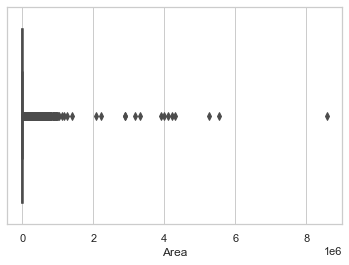

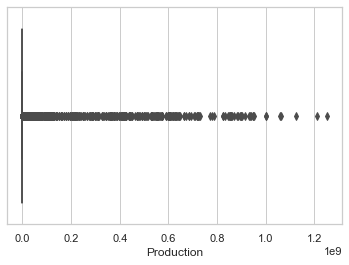

In [7]:
#Checking for outliers
sns.set(style='whitegrid')
sns.boxplot(x=df['Area'])
plt.show()

sns.boxplot(x=df['Production'])
plt.show()

<b>Preprocessing</b>

In [19]:
#The presence of outliers in Area and Production is confirmed by :
#1. High difference in mean and median (50 percentile) values
#2. Boxplots shown above
#3. High values of skewness for Area and Production in data.world metadata.

#'Production' is the only column with missing values and these would be eliminated since they are less in comparison to whole dataset.
df.dropna(subset=["Production"],axis=0,inplace=True)
df.shape

(242361, 9)

In [9]:
#In order to reduce skewness for better predictions, a data transformation technique such as Log can be used.
#Because of zeroes present in data, sqrt is used instead.


df['sqrt_Area'] = np.sqrt(df['Area'])
df['sqrt_Production'] = np.sqrt(df['Production'])

In [10]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,sqrt_Area,sqrt_Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,35.411862,44.721360
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,1.414214,1.000000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,10.099505,17.916473
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,13.266499,25.317978
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,26.832816,12.845233


In [11]:

from scipy.stats import skew
print("Skewness for Production",skew(df['Production'], axis=0, bias=True))
print("Skewness for Sqrt_Production",skew(df['sqrt_Production'], axis=0, bias=True))
print("Skewness for Area",skew(df['Area'], axis=0, bias=True))
print("Skewness for Sqrt_Area",skew(df['sqrt_Area'], axis=0, bias=True))

#Thus, we will use sqrt_area and sqrt_production for analysis further because of their reduced skewness. 
#The data is ready for EDA now.

Skewness for Production 40.74128759742096
Skewness for Sqrt_Production 27.47564634180396
Skewness for Area 47.76882520021943
Skewness for Sqrt_Area 3.35605766017071


<b>EDA - Univarite</b>

In [12]:
#Majority of non-graphical univarite analysis is available in metadata at data.world. 
#Hence, here I'll be making assumptions from results there and analyze the missing features.

#1.State_Name
print("States and their number of data points : \n", df.State_Name.value_counts())

States and their number of data points : 
 Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       

In [13]:
#2. District_Name
print("Districts and their number of data points : \n", df.District_Name.value_counts())

Districts and their number of data points : 
 TUMKUR       931
BELGAUM      924
BIJAPUR      905
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: District_Name, Length: 646, dtype: int64


In [14]:
#3. Crop_year
print("Crop_Years and their number of data points : \n",df.Crop_Year.value_counts())

Crop_Years and their number of data points : 
 2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: Crop_Year, dtype: int64


In [15]:
#4.Seasons
print("Seasons and their number of data points : \n",df.Season.value_counts())

Seasons and their number of data points : 
 Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: Season, dtype: int64


In [16]:
#5.Crops
print("Crops and their number of data points : \n",df.Crop.value_counts())

Crops and their number of data points : 
 Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64


Area and their number of data points : 
 1.000000      3573
1.414214      3140
10.000000     2621
1.732051      2478
2.000000      2182
              ... 
159.903096       1
139.100683       1
300.502912       1
199.243570       1
528.347424       1
Name: sqrt_Area, Length: 38391, dtype: int64


(0.0, 12000.0)

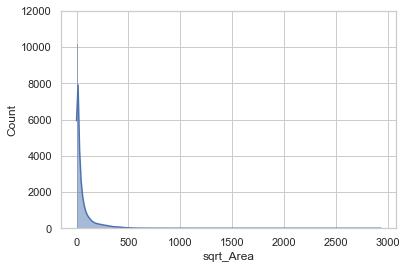

In [17]:
#6. Area
print("Area and their number of data points : \n",df.sqrt_Area.value_counts())
sns.histplot(df.sqrt_Area, kde=True) #Used Kernel Density Estimation over PDE for data smoothing
plt.ylim(0,12000) 

Production and their number of data points : 
 1.000000        4028
0.000000        3523
10.000000       3521
1.414214        2964
1.732051        2311
                ... 
14560.219779       1
1.034408           1
478.895604         1
136.769880         1
773.239290         1
Name: sqrt_Production, Length: 51627, dtype: int64


(0.0, 5000.0)

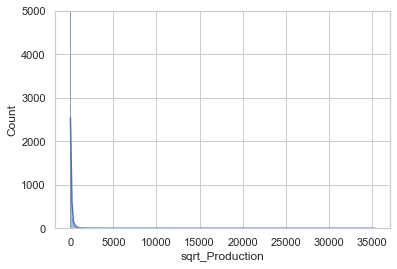

In [18]:
#7. Production
print("Production and their number of data points : \n",df.sqrt_Production.value_counts())
sns.histplot(df.sqrt_Production, kde=True) #Used Kernel Density Estimation over PDE for data smoothing
plt.ylim(0,5000)

<b>EDA - Bivarite</b>

                     State_Name  sqrt_Production
15                       Kerala     4.844234e+06
30                Uttar Pradesh     3.949449e+06
1                Andhra Pradesh     2.210380e+06
27                   Tamil Nadu     2.197204e+06
14                    Karnataka     1.791106e+06
17                  Maharashtra     1.704025e+06
16               Madhya Pradesh     1.690479e+06
3                         Assam     1.480127e+06
32                  West Bengal     1.334288e+06
4                         Bihar     1.302223e+06
9                       Gujarat     1.085031e+06
25                    Rajasthan     9.589645e+05
24                       Punjab     8.100875e+05
10                      Haryana     7.116157e+05
22                       Odisha     6.949047e+05
28                   Telangana      6.530796e+05
6                  Chhattisgarh     3.900752e+05
31                  Uttarakhand     2.805646e+05
23                   Puducherry     1.614543e+05
21                  

<AxesSubplot:xlabel='sqrt_Production', ylabel='State_Name'>

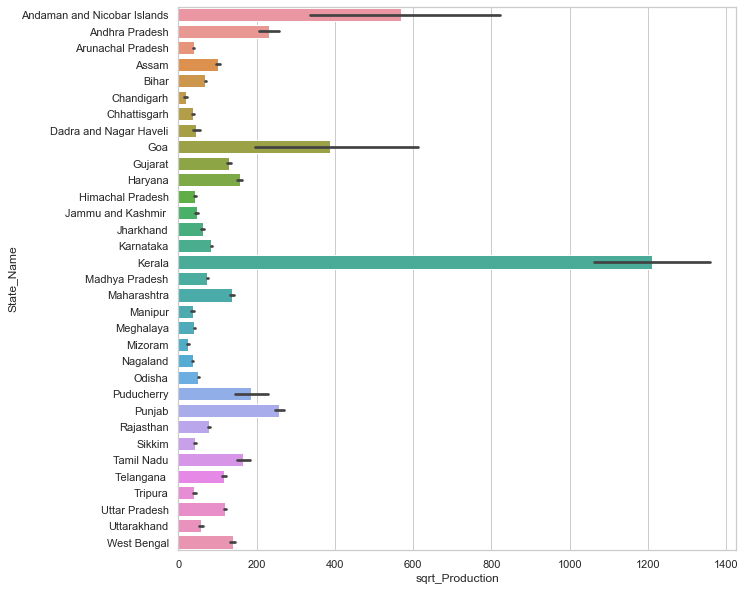

In [42]:
#1. State and 7. Production

print(df.groupby("State_Name")['sqrt_Production'].sum().reset_index().sort_values(by = 'sqrt_Production', ascending = False))

plt.figure(figsize= (10,10))
sns.barplot(x=df['sqrt_Production'],y= df["State_Name"], orient='h')

In [41]:

#2. District and 7. Production

print(df.groupby("District_Name")['sqrt_Production'].sum().reset_index().sort_values(by = 'sqrt_Production', ascending = False))

#skipping the barplot because of many distinct districts

          District_Name  sqrt_Production
334           KOZHIKODE    524988.087546
372          MALAPPURAM    520056.037580
587  THIRUVANANTHAPURAM    434271.521682
590            THRISSUR    429545.144306
286              KANNUR    428227.045803
..                  ...              ...
314              KHUNTI       146.752092
486             RAMGARH       145.793601
238           HYDERABAD       123.875376
415              NAMSAI        28.178006
397              MUMBAI         1.414214

[646 rows x 2 columns]


    Crop_Year  sqrt_Production
14       2011     2.037923e+06
16       2013     1.915041e+06
6        2003     1.748037e+06
11       2008     1.743484e+06
9        2006     1.741544e+06
13       2010     1.657339e+06
7        2004     1.654525e+06
12       2009     1.652846e+06
5        2002     1.626728e+06
10       2007     1.612876e+06
15       2012     1.608942e+06
8        2005     1.604576e+06
4        2001     1.604169e+06
3        2000     1.591052e+06
2        1999     1.493797e+06
1        1998     1.419986e+06
17       2014     1.378432e+06
0        1997     1.122576e+06
18       2015     2.872494e+04


<AxesSubplot:xlabel='sqrt_Production', ylabel='Crop_Year'>

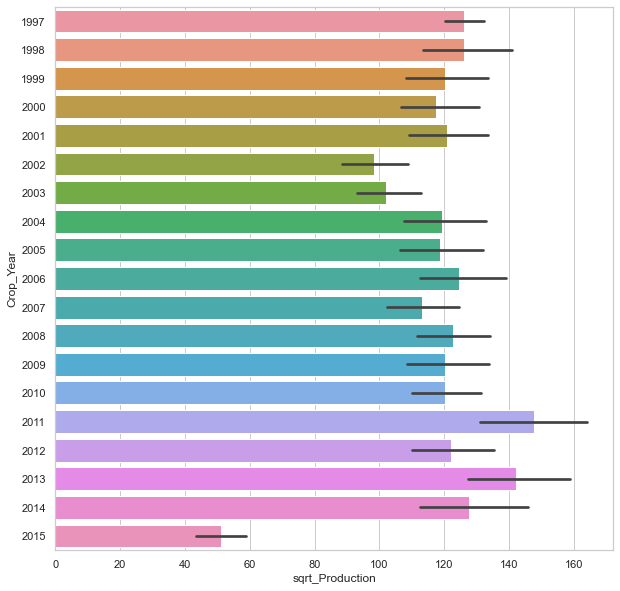

In [43]:

#3. Crop_Year and 7. Production

print(df.groupby("Crop_Year")["sqrt_Production"].sum().reset_index().sort_values(by = 'sqrt_Production', ascending = False))

plt.figure(figsize= (10,10))
sns.barplot(x=df['sqrt_Production'],y= df["Crop_Year"], orient='h')

        Season  sqrt_Production
4  Whole Year      1.320386e+07
1  Kharif          8.226056e+06
2  Rabi            5.640379e+06
5  Winter          9.899863e+05
3  Summer          8.039020e+05
0  Autumn          3.784158e+05


<AxesSubplot:xlabel='sqrt_Production', ylabel='Season'>

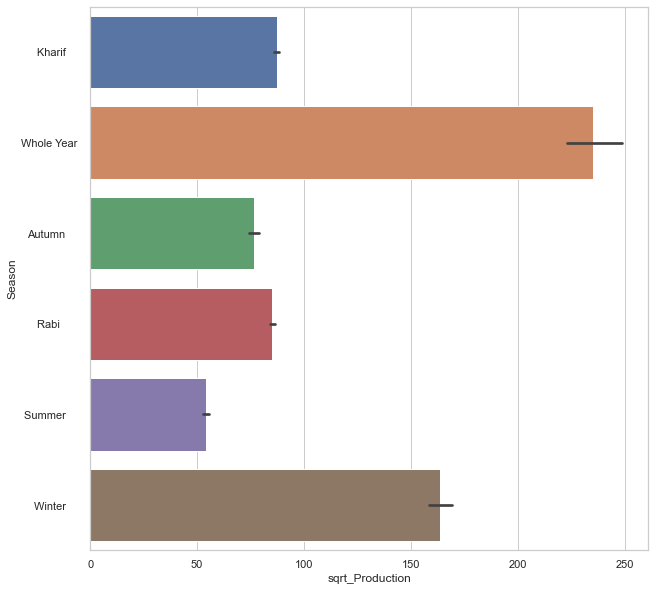

In [44]:

#4. Season and 7. Production

print(df.groupby("Season")["sqrt_Production"].sum().reset_index().sort_values(by = 'sqrt_Production', ascending = False))

plt.figure(figsize= (10,10))
sns.barplot(x=df['sqrt_Production'],y= df["Season"], orient='h')

In [45]:

#5. Crop and 7. Production

print(df.groupby("Crop")["sqrt_Production"].sum().reset_index().sort_values(by = 'sqrt_Production', ascending = False))

#skipping the barplot because of many distinct crops

                Crop  sqrt_Production
28          Coconut      7.685964e+06
106        Sugarcane     3.804680e+06
95              Rice     3.665982e+06
119            Wheat     2.407698e+06
59             Maize     1.229958e+06
..               ...              ...
72   Other Dry Fruit     0.000000e+00
94       Ribed Guard     0.000000e+00
35          Cucumber     0.000000e+00
79              Pear     0.000000e+00
0              Apple     0.000000e+00

[124 rows x 2 columns]


<b>EDA - Multivariate</b>

<AxesSubplot:xlabel='Crop'>

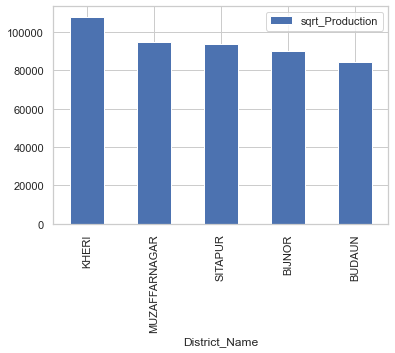

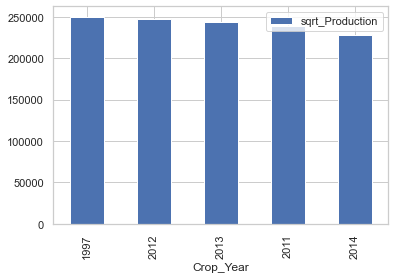

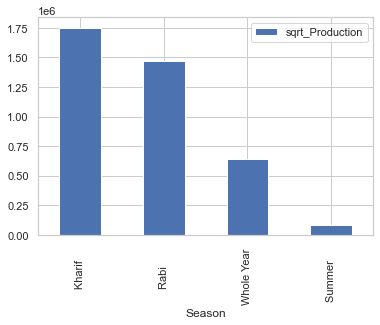

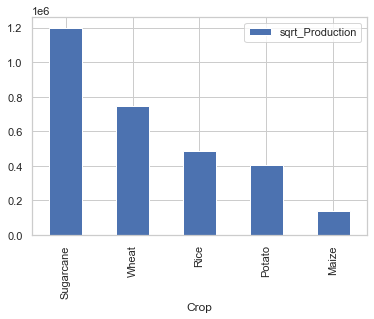

In [60]:
#1. State, 2. District and 7. Production
#1. State, 3. Crop Year and 7. Production
#1. State, 4. Season and 7. Production
#1. State, 5. Crop and 7. Production

#Determining best performing district, crop year, season and crop for a state based on production values
# Eg: for Uttar Pradesh


filtered_df = df.loc[df['State_Name'] == 'Uttar Pradesh']
filtered_df.groupby(["State_Name","District_Name"])["sqrt_Production"].sum().reset_index().sort_values(by = 'sqrt_Production', ascending = False).head(5).plot.bar(x='District_Name')
filtered_df.groupby(["State_Name","Crop_Year"])["sqrt_Production"].sum().reset_index().sort_values(by = 'sqrt_Production', ascending = False).head(5).plot.bar(x='Crop_Year')
filtered_df.groupby(["State_Name","Season"])["sqrt_Production"].sum().reset_index().sort_values(by = 'sqrt_Production', ascending = False).head(5).plot.bar(x='Season')
filtered_df.groupby(["State_Name","Crop"])["sqrt_Production"].sum().reset_index().sort_values(by = 'sqrt_Production', ascending = False).head(5).plot.bar(x='Crop')

#Similarly, for every ditrict, best crop year, season and crop can be calculated based on production

<AxesSubplot:xlabel='Season'>

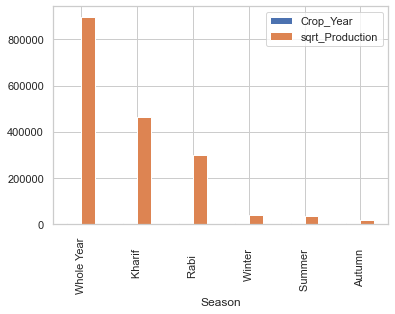

In [79]:
#3. Crop_Year, 4. Season and 7.Production
#Determing best season for a year based on production values. It can be used to find best crop for the year too.
#eg: Year 2003

filtered_df = df.loc[df['Crop_Year'] == 2003]
filtered_df.groupby(['Crop_Year',"Season"])["sqrt_Production"].sum().reset_index().sort_values(by = 'sqrt_Production', ascending = False).plot.bar(x="Season")

<AxesSubplot:xlabel='Crop'>

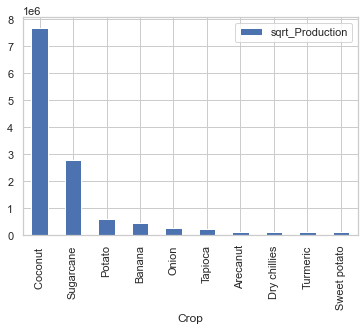

In [94]:
#4. Season, 5. Crop and 7.Production
#Determing best crop for a season based on production values.
#eg: Kharif Season

filtered_df = df.loc[df["Season"] == "Whole Year "]
filtered_df.groupby(["Season","Crop"])["sqrt_Production"].sum().reset_index().sort_values(by = 'sqrt_Production', ascending = False).head(10).plot.bar(x="Crop")

/Users/mihirpamnani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


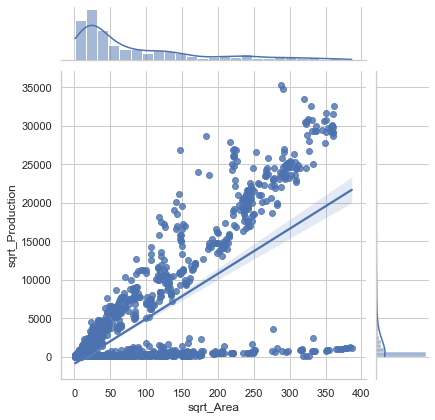

In [102]:
#5. Crop, 6. Area and 7. Production
#Determining the relation between Area and Production for a crop
#Eg: Coconut

coco_df = df.loc[df["Crop"] == "Coconut "]
sns.jointplot("sqrt_Area","sqrt_Production",data=coco_df,kind="reg")

/Users/mihirpamnani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


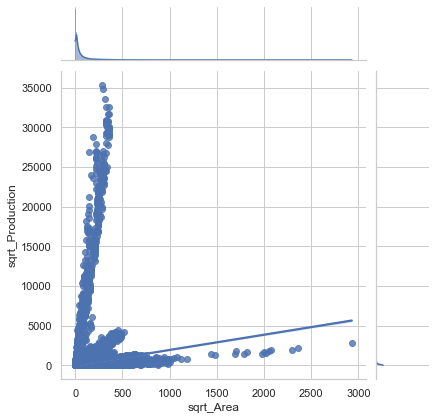

In [101]:
#Relationship between 6.Area and 7.Production
sns.jointplot("sqrt_Area","sqrt_Production",data=df,kind="reg")